**Pavan Mahajan**

# **Prediction using Unsupervised ML**


**From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually.**

In [3]:
#importing required libralies
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
sn.set()
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [4]:
data=pd.read_csv('Iris.csv')
data.head()                         # read Data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()          # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


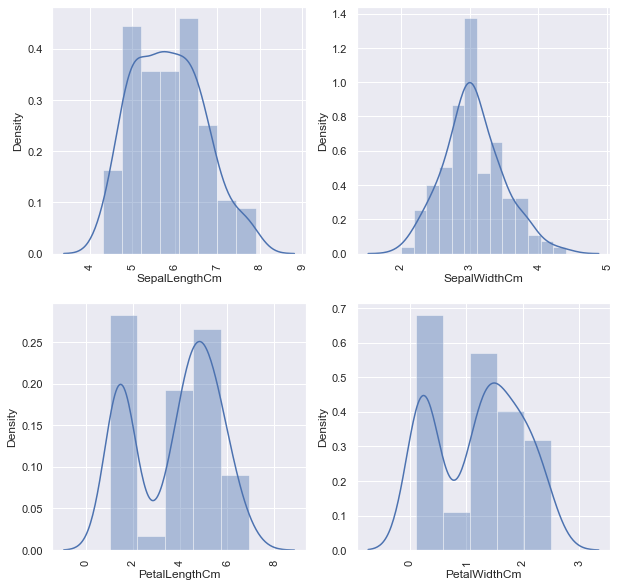

In [8]:
import warnings
warnings.filterwarnings("ignore")                  # Data visualization
a=data.iloc[:,[1,2,3,4]]
fig , ax=plt.subplots(2,2, figsize=(10,10))
for var,subplot in zip (a, ax.flatten()):
        sn.distplot(data[var],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)
          

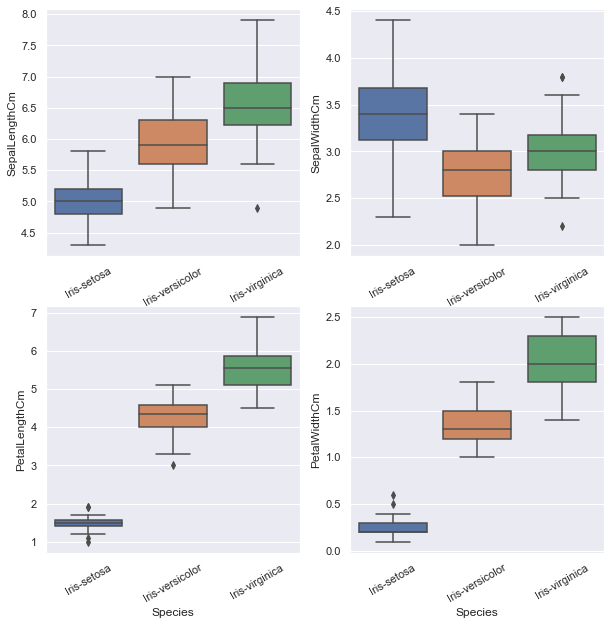

In [21]:

c=['SepalLengthCm','SepalWidthCm' ,'PetalLengthCm' ,'PetalWidthCm']
fig , ax=plt.subplots(2,2, figsize=(10,10))
for var,subplot in zip (c, ax.flatten()):
        sn.boxplot(x="Species",y=var,data=data,ax=subplot)          # Data visualization
        for label in subplot.get_xticklabels():
            label.set_rotation(30)

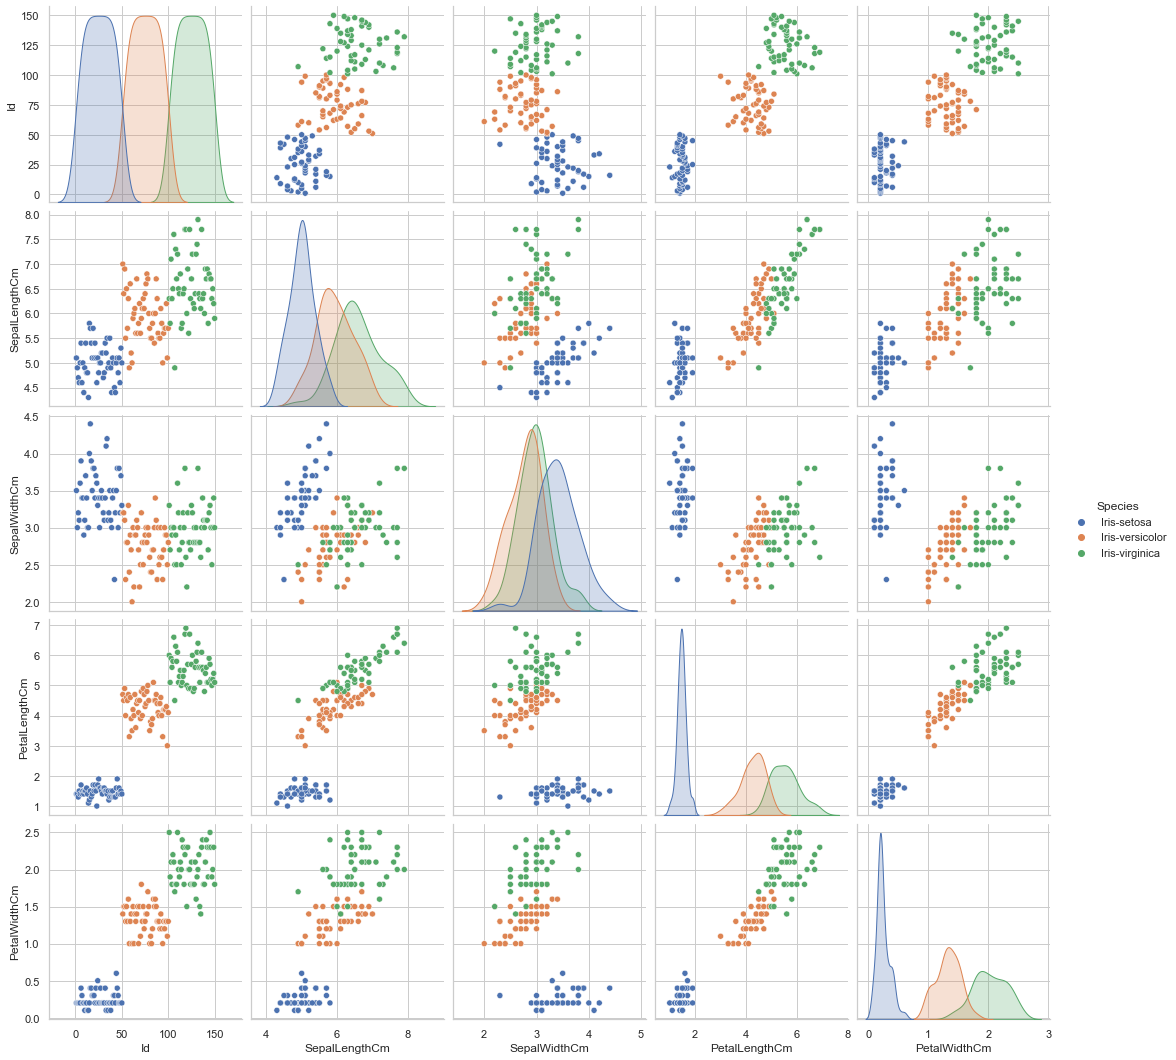

In [56]:
sn.set_style("whitegrid")
sn.pairplot(data,hue="Species",size=3);    #   Data visualization
plt.show()

In [22]:
x = data.iloc[:, [0, 1, 2, 3]].values


In [23]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
w = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    w.append(kmeans.inertia_)

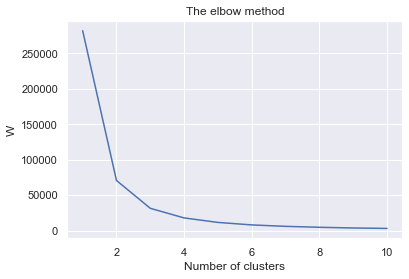

In [24]:
plt.plot(range(1, 11), w)            #Using the elbow method to determine the optimal number of clusters for k-means clustering
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('W')                          #within cluster sum of squares
plt.show()


**Implementing K-Means Clustering**


In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans                             # Applying kmeans to the dataset / Creating the kmeans classifier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

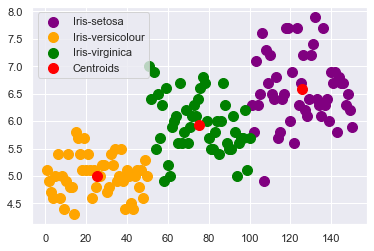

In [26]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c='red',label='Centroids')

plt.legend()